# Regression Analysis

># 1. Sample Data

### Boston House Prices dataset
* Load data

```python
from sklearn.datasets import load_boston
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()
```
* Pairplot

```python
cols = ["LSTAT", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols])
plt.show()
```

### Diabetes dataset

```python
from sklearn.datasets import load_diabetes
```

### Linnerrud dataset
```python
from sklearn.datasets import load_linnerud
```

># 2. make_regression

$$ y = b + w^T x + e $$ 
[more](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)

In [2]:
from sklearn.datasets import make_regression
X, y, w = make_regression(n_samples=10, n_features=1, bias=0, noise=0, coef=True, random_state=0)

* Input 
>* `n_samples` : No. of samples / default=100
>* `n_features` : No. of features / default=100
>* `n_targets` : No. of target / default=1
>* `n_informative` : No. of features that actually have correlation with targets / default=10
>* `effective_rank`: No. of independent features / default=None (all features are independent)
>* `tail_strength` : Determines correlation between independent features (`effective_rank != None`) / default = 0.5
>* `bias` : Bias / default=0.0
>* `noise` : Stdev of error added to the targets / default=0.0 
>* `coef` : if True, print the coefficents of the linear model / default=False
>* `random_state` : random seed / default=False

* Output
>* `X` : features in size of [`n_samples`, `n_features`]
>* `y` : targets in size of [`n_samples`] or [`n_samples`, `n_targets`]
>* `coef` : coefficients in size of [`n_features`] or [`n_features`, `n_targets`]

># 3. Deterministic Linear Regression Analysis

### Definitions
* Regression Analysis: quantitative analysis on the relationship between $x$(independent variables) and $y$(dependent variables)
* Deterministic Model:

$$ \hat{y} = f \left( x \right) $$

* Since the model is dependent on previous data,

$$ \hat{y} = f \left( x; \{ x_1, y_1, x_2, y_2, \cdots, x_N, y_N \} \right) $$

* Linear Regression Analysis

$$ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D $$

### Augmentation
* Adding constant to the independent variables

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
$$

$$ f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a = w_a^T x_a
$$

* StatsModels - `add_constant`
```python
import statsmodels.api as sm
X = sm.add_constant(X0)
```

### OLS (Ordinary Least Squares)
* Minimizes RSS (Residual Sum of Squares)
$$$$
$$ \hat{y} = Xw $$
$$$$
$$ e = {y} - \hat{y} = y - Xw $$
$$$$
$$\begin{eqnarray}
\text{RSS}
&=&  e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray}$$
$$$$
$$ \dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w = 0$$
$$$$
$$ X^TX w = X^T y $$
$$$$
$$  w = (X^TX)^{-1} X^T y $$
$$$$
* **Normal equation:**
$$$$
$$ X^T y - X^TX w = 0 $$
$$$$
$$ X^T (y - X w ) = X^T e = 0 $$
$$$$
$$ x_d^T e = 0 $$
$$$$
$$ x_d \perp e $$

### OLS - NumPy
* True Model:
$$ y = 100 + 80.7105 x + e $$
* Predicted Model:
$$ \hat{y} = 102.0270 + 81.5975 x $$

In [4]:
from sklearn.datasets import make_regression

bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [5]:
# Direct Calculation
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[ 102.02701439],
       [  81.59750943]])

In [7]:
# use lstsq method
w = np.linalg.lstsq(X, y)[0]
w

array([[ 102.02701439],
       [  81.59750943]])

### OLS - Scikit-Learn

1. `model = LinearRegression(fit_intercept=True)`
>* `fit_intercept=False` if there is no constant coefficient
>* The `LinearRegression` object has the following attributes
>  * `coef_`: predicted coefficient vector
>  * `intercept_`: predicted constant coefficient

2. `model = model.fit(X, y)` 
>* Returns itself
>* Augmentation not needed

3. `y_new = model.predict(x_new)`

In [11]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

In [12]:
model_boston.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [13]:
model_boston.intercept_

36.491103280359525

### OLS - StatsModels

1. `model = OLS(y, X)`
>* Augmentation needed / use `add_constant` method
2. `result = model.fit()`
>* Returns `RegressionResults` class object
>* This class has two methods - `summary` and `predict`
>* This class has two attributes - `resid` and `params`
3. `y_new = result.predict(x_new)`
>* x_new should be augmented

In [15]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 13 Oct 2017   Prob (F-statistic):          6.95e-135
Time:                        18:06:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

># 4. Probabilistic Linear Regression Analysis

### Bootstrapping
* Regression Analysis with re-sampled data
* Check the sample-dependency of the model
* Resampling with replacement: choose $N$ data from $N$ data

### Probabilistic Linear Regression Analysis
* **Assumption 1: Target Data Distribution**
* ($x$ and $y$ themselves do not have to be Normally distributed)
$$ y \sim \mathcal{N}(w^Tx, \sigma^2) $$
$$ \epsilon_i = y - w^Tx $$
$$$$
* **Assumption 1-1: Normal d.**
$$ p(y \mid x, \theta) = \mathcal{N}(y \mid w^Tx, \sigma^2 ) $$ <br>
$$ p(\epsilon \mid \theta) = \mathcal{N}(0, \sigma^2 ) $$ <br>
$$$$
* **Assumption 1-2: Exogeneity**
$$ \text{E}[\epsilon \mid x] = 0$$ <br>
$$$$
* **Assumption 1-3: Conditional Independence**
$$ \text{Cov}[\epsilon_i, \epsilon_j \mid x] =  0$$ 
$$$$
* **Assumption 2: Independent Variables**
$$ \text{Covariance Matrix of the independent variables is full rank}$$
$$$$

### MLE - Maximum Likelihood Estimation
* **Likelihood:**
$$
\begin{eqnarray}
p(y_{1:N} \,\big|\, x_{1:N}, \theta)
&=& \prod_{i=1}^N N(y_i \,\big|\, w^T x_i , \sigma^2) \\
&=& \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
\end{eqnarray}
$$
$$$$
* **Log Likelihood:**
$$
\begin{eqnarray}
\text{LL}  
&=& \log p(y_{1:N} \,\big|\, x_{1:N}, \theta) \\
&=& \log \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
&=& -\dfrac{1}{2\sigma^2} \sum_{i=1}^N (y_i-w^T x_i)^2 - \dfrac{1}{2} \sum_{i=1}^N  \log{2\pi}{\sigma^2}  \\
\end{eqnarray}
$$
$$$$
* **LL(Matrix notation):**
$$ \text{LL}  =  -C_1 (y - Xw)^T(y-Xw) - C_0 = -C_1(w^TX^TXw -2 y^TXw + y^Ty) - C_0 $$
$$ C_1 =  -\dfrac{1}{2\sigma^2} $$
$$ C_0 =  \dfrac{1}{2} \sum_{i=1}^N  \log{2\pi}{\sigma^2} $$
$$$$
* **Optimization:**
$$ \dfrac{\partial}{\partial w} \text{LL} \propto - 2X^TX \hat{w} + 2X^Ty = 0 $$
$$ \hat{w} = (X^TX)^{-1}X^T y $$

### Residual: normal distribution
* Relationship between error($\epsilon$) and residual($e$)

$$  \hat{y} = X\hat{w} = X (X^TX)^{-1}X^T y = Hy $$

$$ e = y - \hat{y}= y - Hy = (I - H) y$$

* Define $M = I - H$,

$$ e = My = M (Xw + \epsilon) $$

* Use Normal Equation,

$$
X^TX \hat{w} - X^Ty = 0
$$

$$
X^T(X\hat{w} - y) = -X^Te = 0
$$

$$
X^TMy = 0 
$$

* Since this holds for any $y$,

$$
X^TM = 0
$$

* Since $H$ is symmetric, $M = I -H$is also symmetric

$$
MX = 0
$$


$$ e = MXw + M\epsilon = M\epsilon $$


$$ e =  M\epsilon $$

* The residual is a linear transformation of the error
* Thus, it is also normally distributed

### Normality Test

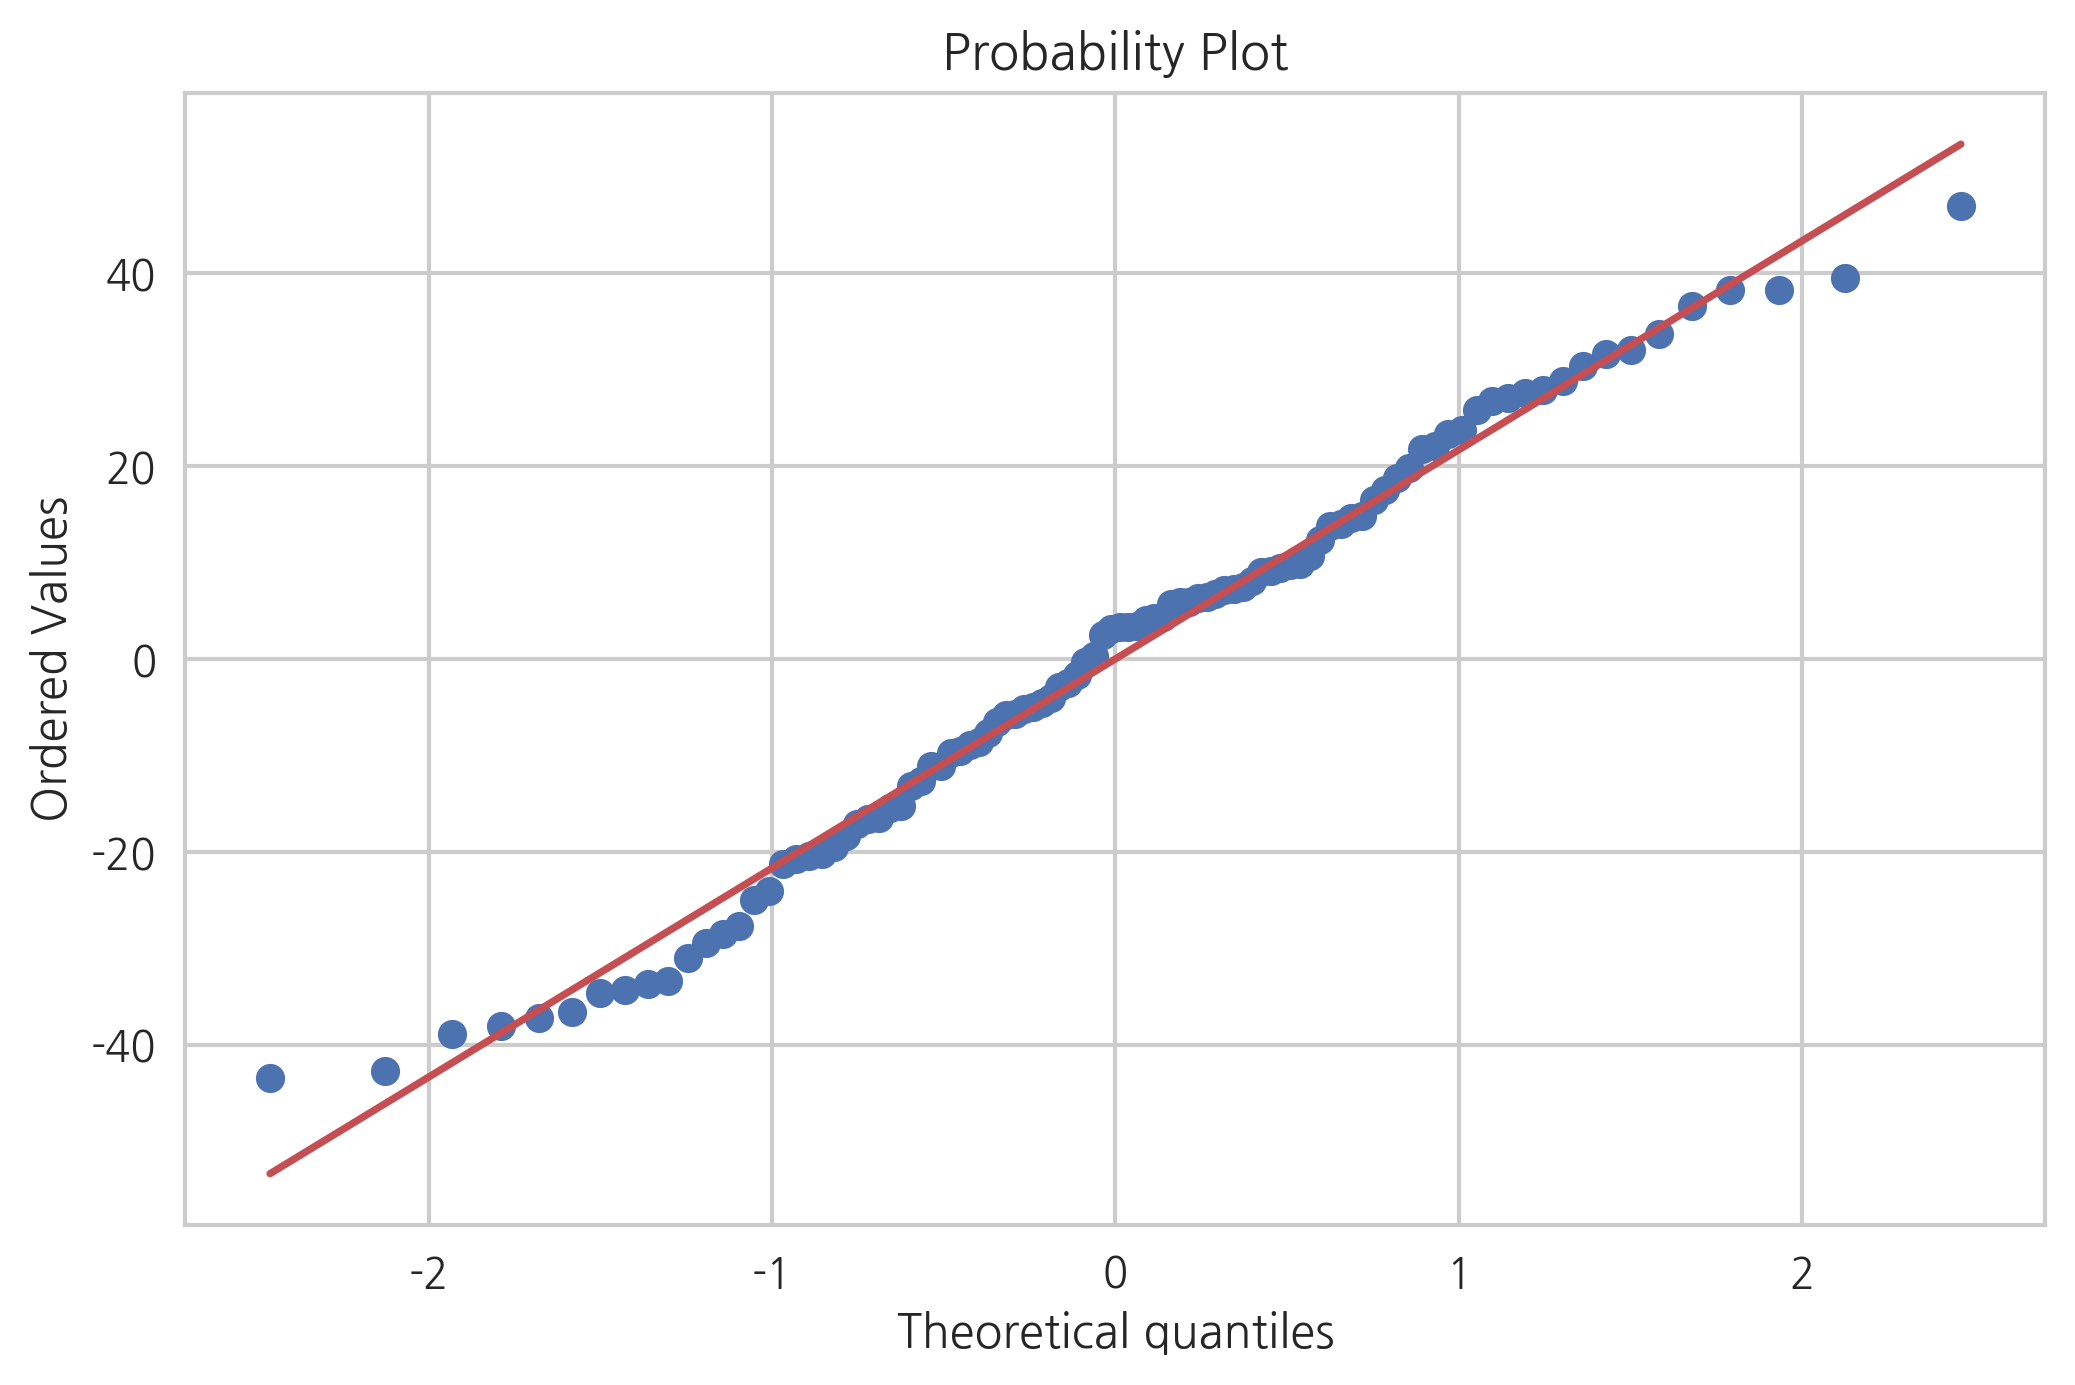

In [8]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

In [9]:
test = sms.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  3.523
P-value     :  0.172


In [10]:
test = sms.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera :  2.059
P-value     :  0.357
Skew        : -0.073
Kurtosis    :  2.312


### Residual dependence on independent variable

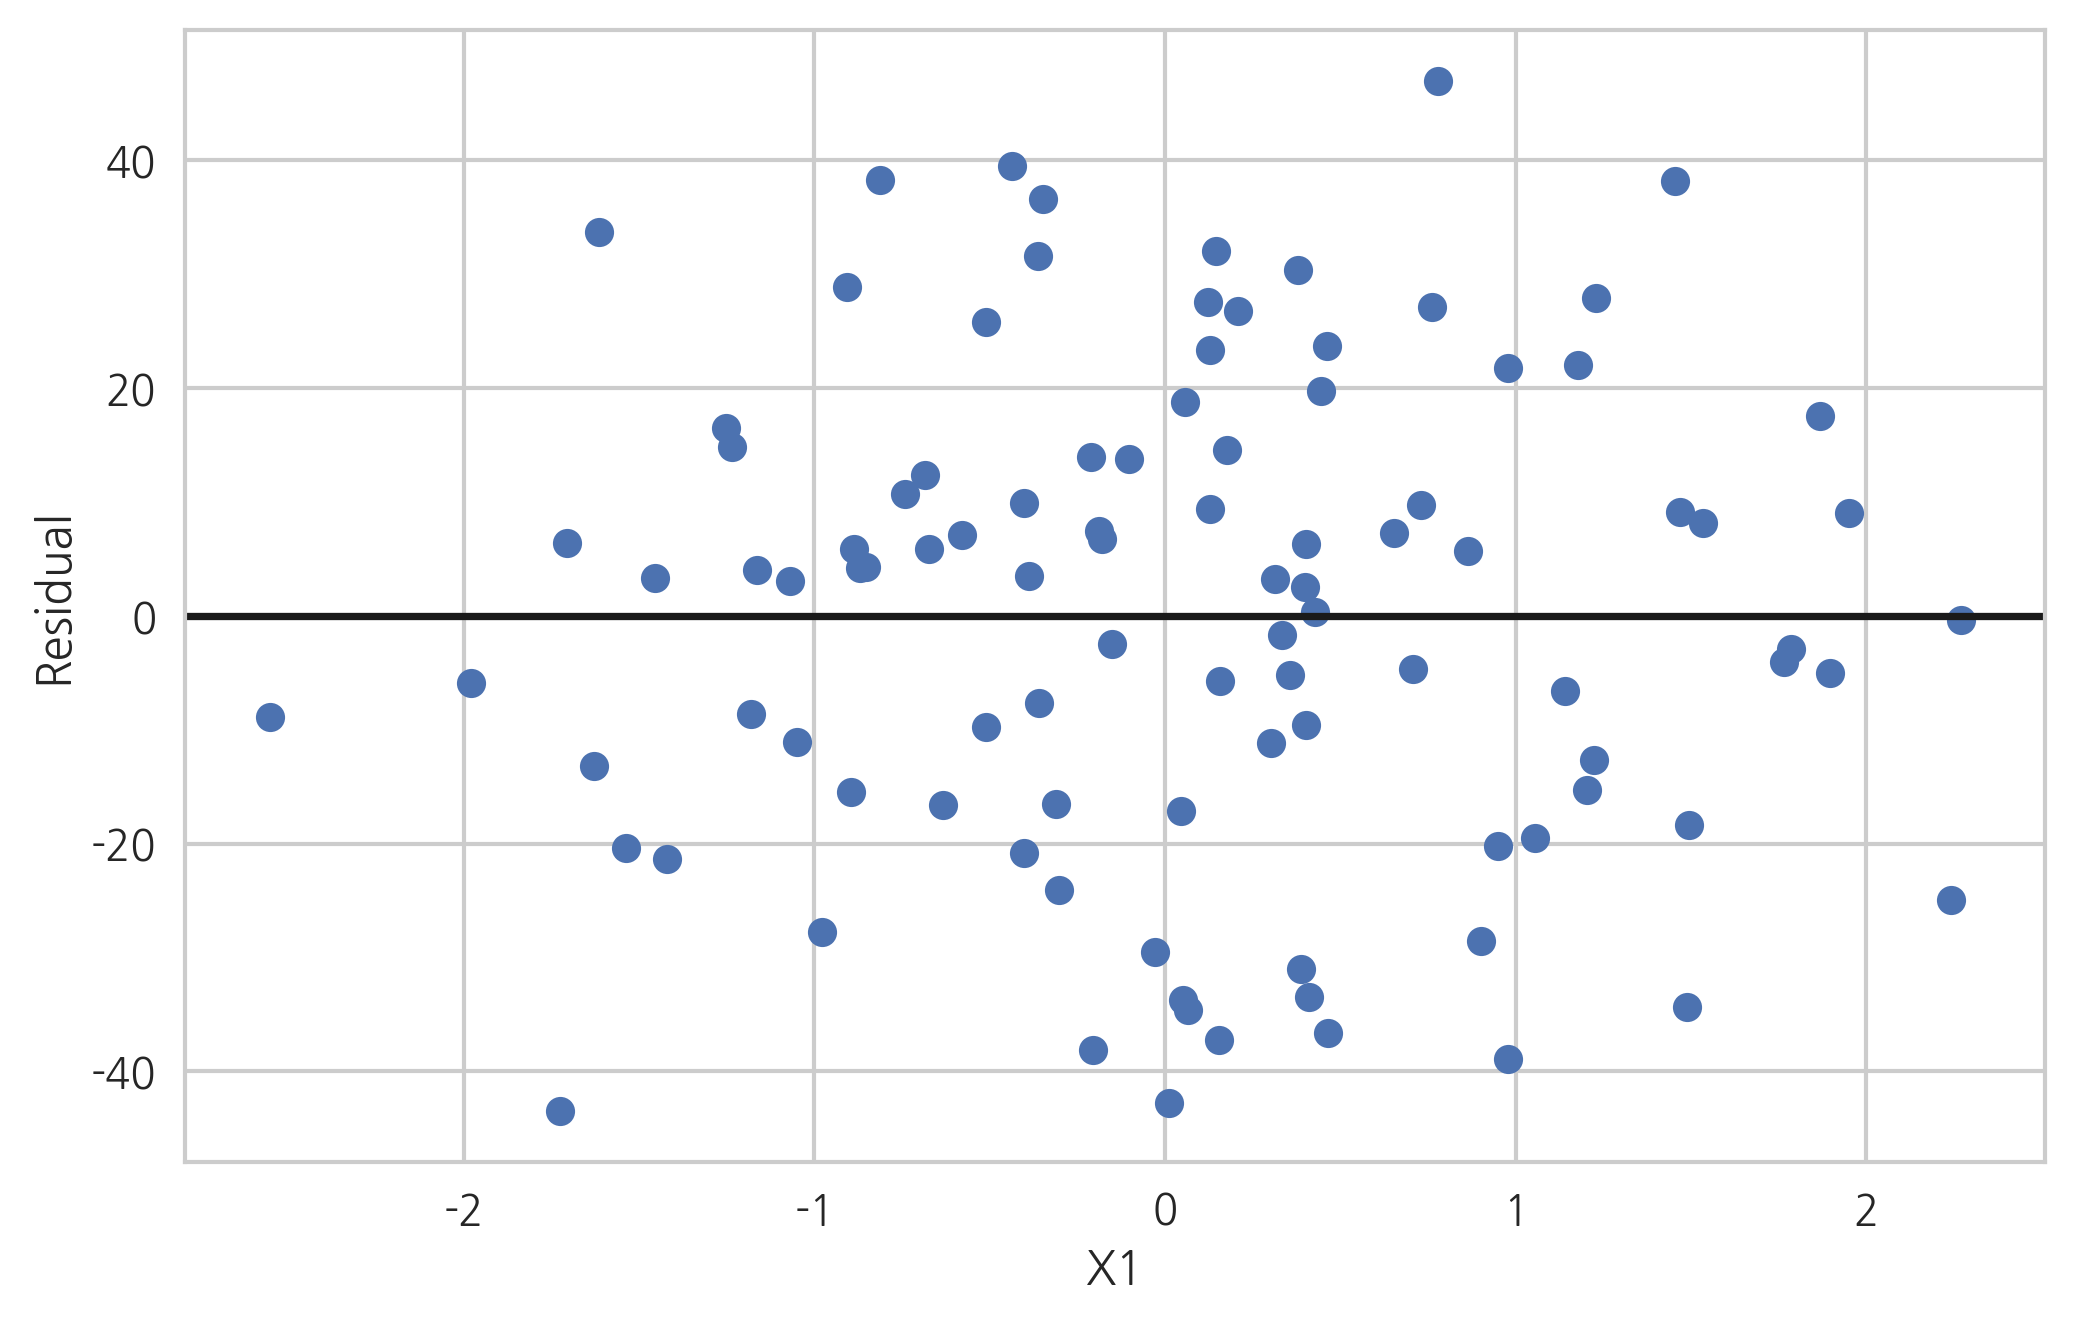

In [11]:
plt.plot(X0, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

### Standard Error of Regression Coefficient
* $\hat{w}$ : normal distribution (since it is a linear transformation of $y$)
$$  
\begin{eqnarray}
\hat{w} 
&=& (X^TX)^{-1} X^T y \\
&=& (X^TX)^{-1} X^T (X w + \epsilon) \\
&=& w + (X^TX)^{-1} X^T \epsilon \\
\end{eqnarray}
$$

$$  
\begin{eqnarray}
\text{E}[\hat{w}] 
&=&  \text{E}[ w + (X^TX)^{-1} X^T \epsilon ] \\
&=&  w + (X^TX)^{-1} X^T \text{E}[ \epsilon ] \\
&=& w
\end{eqnarray}
$$

* Covariance of the coefficients:

$$
\begin{eqnarray}
\text{Cov}[\hat{w}] 
&=& E[(\hat{w} - w)(\hat{w} - w)^T] \\
&=& E[((X^TX)^{-1} X^T \epsilon)((X^TX)^{-1} X^T \epsilon)^T] \\
&=& E[(X^TX)^{-1} X^T \epsilon \epsilon^T X(X^TX)^{−1} ] \\
&=& (X^TX)^{-1} X^T E[\epsilon \epsilon^T] X(X^TX)^{−1} \\
&=& (X^TX)^{-1} X^T (\sigma^2 I) X(X^TX)^{−1} \\
&=& \sigma^2  (X^TX)^{-1}
\end{eqnarray}
$$

* Estimation of $\sigma^2$ ($N$: no. of data / $K$: no. of independent variables):

$$ s^2 = \dfrac{e^Te}{N-K} = \dfrac{RSS}{N-K} $$

* Hence,

$$ \text{Est.Cov}[\hat{w}]  = s^2(X^TX)^{-1}$$

$$\text{Est.Var}[\hat{w}_i]  = \left( \text{Est.Cov}[\hat{w}] \right)_{ii} $$

* **Standard Error of Regression Coefficient**:

 $$ {se_i} = \sqrt{s^2 \big((X^TX)^{-1}\big)_{ii}} $$

### Single Coefficient t-test

* Determines the significance of each independent variable

$$  \dfrac{\hat{w}_i - w_i}{se_i} \sim t_{N-K} $$

* Use this as test statistics & test for the following null hypothesis

$$ H_0 : \;\; w_i = 0 $$

* The `RegressionResults` class object has t_test() method

In [16]:
print(result.t_test("X1 = 40"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


### F-statistics (Loss-of-Fit test)
* Null hypothesis:
$$ H_0 : w_1  = w_2 = \cdots = w_K = 0 $$
* Determines the significance of the entire model / the smaller the better

># 5. Leverage & Outlier
* Leverage: self-influence, self-sensitivity

### Mathematical Definition
* Influence Matrix (or Hat Matrix):

$$  w = (X^TX)^{-1} X^T y $$

$$  \hat{y} = X w = X((X^TX)^{-1} X^T y ) = ( X(X^TX)^{-1} X^T) y $$

$$H = X (X^TX)^{-1}X^T$$

$$  \hat{y} =  Hy $$

* Leverage:

$$ \hat{y}_i = h_{i1} y_1 + h_{i2} y_2 + \cdots + h_{ii} y_i + \cdots + h_{iN} y_N $$

$$  h_{ii}=(H)_{ii} $$

* 1) $  0 \leq h_{ii} \leq 1 $

* 2) $  \text{tr}(H) = \sum_i^N h_{ii} = K $ / K contains bias

* 3) $ h_{ii} \approx \dfrac{K}{N} $

### Leverage - StatsModels
* `get_influence` method in `RegressionResults` class

In [ ]:
model = sm.OLS(y, X)
result = model.fit()
influence = result.get_influence()
hat = influence.hat_matrix_diag
hat.sum()

In [ ]:
# Visualize the data with high leverage
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.show()

### Standardized Residual
1) STDEV of Residual
* use $HH^T=H$

$$ e = y - \hat{y}= y - Hy = (I - H) y$$

$$
\begin{eqnarray}
\text{Var}[e] 
&=& \text{E}[(I - H) yy^T (I - H)^T] \\
&=& (I - H) \text{E}[yy^T] (I - H)^T \\
&=& (I - H) \text{E}[ee^T] (I - H)^T \\
&=& (I - H) \sigma^2 I (I - H)^T \\
&=& \sigma^2(I - H)(I - H^T) \\
&=& \sigma^2(I - H) \\
\end{eqnarray}
$$

$$ \text{Var}[e_i] = \sigma^2 (1 - h_{ii}) $$ 

2) Standardized Residual

$$ r_i = \dfrac{e_i}{s\sqrt{1-h_{ii}}} $$

* where,

$$ s^2 = \dfrac{e^Te}{N-K} = \dfrac{RSS}{N-K} $$

### Outlier
* Standard Residual > 2~4 $\rightarrow$ outlier
* Residual: `result.resid`
* Standard Residual: `result.resid_pearson`

### Cook's Distance
* Outlier: big leverage **and** big residual
* Cook's distance: 
$$ D_i = \frac{r_i^2}{\text{RSS}}\left[\frac{h_{ii}}{(1-h_{ii})^2}\right] $$
* Fox' Outlier Recommendation
$$ D_i > \dfrac{4}{N − K - 1} $$
* Outlier visualization
  * Leverage vs. Normalized residuals squared plot
    * `sm.graphics.plot_leverage_resid2(result)`
  * Cook's distance bubble plot
    * `sm.graphics.influence_plot(result, plot_alpha=0.3)`

># 6. Categorical Variables
* Categorical Variable 
  * dummy variable / indicator variable / design variable / Boolean indicator / binary variable / treatment
* One Hot Encoding: One categorical value $\rightarrow$ One dummy variable
  * No constant when using one hot encoding
  * **OR** Use constant and drop one categorical value (StatsModels)

In [ ]:
model = sm.OLS.from_formula("y ~ C(x) + 0", df)
result = model.fit()
print(result.summary())

># 7. ANOVA - Analysis of Variance

### Definitions
* TSS - Total Sum of Squares
$$\text{TSS} = \sum_i (y_i-\bar{y})^2 = (y - \bar{y})^T(y - \bar{y} )$$
* ESS - Explained Sum of Squares
$$\text{ESS}=\sum_i (\hat{y}_i -\bar{\hat{y}})^2 = (\hat{y} - \bar{\hat{y}})^T(\hat{y} - \bar{\hat{y}})$$
* RSS - Residual Sum of Squares
$$\text{RSS}=\sum_i (y_i - \hat{y}_i)^2\ = e^Te$$

### TSS = ESS + RSS
* Proof)

$$ \bar{e} = \bar{y} - \bar{\hat{y}} = 0$$

$$ \bar{y} = \bar{\hat{y}} $$

$$ y = X\hat{w} + e = \hat{y} + e $$

$$ y - \bar{y} = \hat{y} - \bar{y} + e = (X- \bar{X})\hat{w} + e $$

$$ X^Te = \bar{X}^Te = 0 $$

$$
\begin{eqnarray}
\text{TSS} 
&=& (y - \bar{y})^T(y - \bar{y} ) \\
&=& (\hat{y} - \bar{y} + e)^T(\hat{y} - \bar{y} + e) \\
&=& (\hat{y} - \bar{y})^T(\hat{y} - \bar{y}) + e^Te + 2(\hat{y} - \bar{y})^Te \\
&=& (\hat{y} - \bar{y})^T(\hat{y} - \bar{y}) + e^Te + 2\hat{w}^T(X - \bar{X})^Te \\
&=& (\hat{y} - \bar{y})^T(\hat{y} - \bar{y}) + e^Te \\
&=& \text{ESS} + \text{RSS}
\end{eqnarray}
$$

### Coefficient of Determination
* Parameterise the model's performance
* $R^2=0$ = meaningless model 
* $R^2=1$ = perfect model
$$R^2 \equiv 1 - \dfrac{\text{RSS}}{\text{TSS}}\ = \dfrac{\text{ESS}}{\text{TSS}}\ $$
$$$$
$$0 \leq R^2  \leq 1$$

### ANOVA table
* $N$: No. of Data
* $K$: No. of Parameters

| source | degree of freedom | sum of square | $ $ mean square $ $  | F test-statstics | p-value |
|-|-|-|-|-|-|
| Regression| $$K-1$$  | $$\text{ESS}$$ | $$s_{\hat{y}}^2 = \dfrac{\text{ESS}}{K-1}$$   | $$F=\dfrac{s_{\hat{y}}^2}{s_e^2} $$ | p-value |
| Residual  | $$N-K$$  | $$\text{RSS}$$  | $$s_e^2= \dfrac{\text{RSS}}{N-K}$$ |
| Total     | $$N-1$$  | $$\text{TSS}$$ | $$s_y^2= \dfrac{\text{TSS}}{N-1}$$ | 
| $R^2$     |          |  $$\text{ESS} / \text{TSS}$$ |  | |


### ANOVA statsmodels
* $TSS$: `result.uncentered_tss`
* $RSS$: `result.mse_model`
* $RSS$: `result.ssr`
* $R^2$: `result.rsquared`
* ANOVA table: `sm.stats.anova_lm(result)`

### F-test statistics
* Null Hypothesis: the model is completely useless ($H_0: R^2 = 0$)
* $PR(>F)$: the smaller the better
$$$$
$$ \dfrac{\text{ESS}}{K-1} \div  \dfrac{\text{RSS}}{N-K} = \dfrac{R^2/(K-1)}{(1-R^2)/(N-K)} \sim F(K-1, N-K) $$
$$$$
* Used to analyze the feature importance (compare the reduced model to the full model
  * `sm.stats.anova_lm(result, typ=2)`

### ANOVA - Categorical Variables

* $K$: No. of Category
* BSS - Between-Group Variance
  $$ BSS = \sum_{k=1}^K (\bar{y} - \bar{y}_k)^2 $$

* WSS - Within-Group Variance
  $$ WSS = \sum_{k=1}^K \sum_{i}^N (y_{i} - \bar{y}_k)^2 $$

* TSS - Total Sum of Squares
  $$ TSS = \sum_{i}^N (y_{i} - \bar{y})^2 $$

| source | degree of freedom | sum of square | $ $ mean square $ $ | F test-statstics | p-value |
|-|-|-|-|-|-|
| Between  | $$K-1$$ | $$\text{BSS}$$ | $$s_{\hat{y}}^2 = \dfrac{\text{ESS}}{K-1}$$   | $$F=\dfrac{s_{\hat{y}}^2}{s_e^2} $$ | p-value |
| Within   | $$N-K$$  | $$\text{WSS}$$  | $$s_e^2= \dfrac{\text{RSS}}{N-K}$$ | 
| Total     | $$N-1$$  | $$\text{TSS}$$ | $$s_y^2= \dfrac{\text{TSS}}{N-1}$$ | 
| $R^2$   |    |  $$\text{BSS} / \text{TSS}$$ |  | |

># 8. Diagnosis

### Residuals - Normality Test
* QQ Plot

```python
sp.stats.probplot(result.resid, plot=plt)
plt.show()```
* Normality Test

```python
test = sms.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)```

### Residuals vs. Independent Variables
* If the model is correct, there should be no correlation between the residuals and the independent variables
* The absence of such correlation cannot be used to support the correctness of a model

### Partial Regression Plot
* Visualize the influence of a single feature
  * 1) $Y$ ~ $X$ $\rightarrow e_{YX}$
  * 2) $Z$ ~ $X$ $\rightarrow e_{ZX}$
  * 3) $e_{ZX}$ ~ $e_{YX}$ $\rightarrow$ Partial Regression Plot
* Statsmodels - `plot_regress_exog`
```python
fig = sm.graphics.plot_regress_exog(result, "X1")
fig.suptitle("")
plt.show()
```
* Statsmodels - `sm.graphs.plot_partregress_grid`
```python
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()
```

### CCPR(Component-Component plus Residual) plot
* Visualize the influence of a single feature
  * 1) $ y = \hat{y} + e = w_1 x_1 +  w_2 x_2 +  \cdots + w_i x_i +  \cdots +  w_K x_K + e $
  * 2) $ x_i \;\; \text{ vs } \;\; w_i x_i + e \rightarrow$ scatter plot
* Statsmodels - `plot_ccpr`
```python
sm.graphics.plot_ccpr(result, "X1")
plt.show()
```
* Statsmodels - `plot_ccpr_grid`
```python
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()
```

### Heteroskedasticity
* In real world data, $\text{VAR}[Y]$ tend to increase as $X$ increase
* One way to solve this problem is to take $log(Y)$ instead of $Y$

># 9. Estimation of the Model's Relative Quality

### Adjusted Determinination Constant
* The bigger, the better
$$$$
$$ R_{adj}^2 = 1 - \frac{n-1}{n-K}(1-R^2) = \dfrac{(n-1)R^2 +1-K}{n-K} $$

### Information Criterion
* The smaller, the better
* AIC(Akaike IC): $ \text{AIC} = -2\log L + 2K $
* BIC(Bayesian IC): $ \text{BIC} = -2\log L + K\log n $

># 10. Scaling

### Condition Number
* measures how much the output value of the function can change for a small change in the input argument
* the smaller, the better
$$$$
$$ \text{condition number} = \dfrac{\lambda_{\text{max}}}{\lambda_{\text{min}}} $$
$$$$
* large Condition No. = ill-conditioned
 * cause1: difference in units $\rightarrow$ solve by scaling
 * cause2: multicolinearity $\rightarrow$ solve by dimension reduction (e.g. PCA)

># 11. Multicolinearity
* A variable can be linearly predicted form the others with a substantial degree of accuracy

### Check Multicolinearity
```python
# correlation constant matrix
dfX0.corr()
# generate heatmap
sns.heatmap(dfX0.corr())
plt.show()
```

### Solve Multicolinearity 
* Delete variables with high dependency
* PCA(Principal Component Analysis)
* Regularization

### VIF(Variation Inflation Factor)
* One way to find dependent variables
* Idea: predict $i$th variable with other variables and compare the performance
$$$$
$$ \text{VIF}_i = \frac{\sigma^2}{(n-1)\text{Var}[X_i]}\cdot \frac{1}{1-R_i^2} $$

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
vif["features"] = dfX0.columns
vif
```

># 12. Polynomial Regression
* Used to analyze non-linear data
* Use **Linear Basis Function Models**
$$ y_i = \sum_{j=1}^{M} w_j \phi_j(x)  = w^T \phi(x)  $$

### Polynomial Regression with StatsModels
```python
sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3)", data=df).fit().summary() 
```

># 13. Cross Validation
* Prevents overfitting
* 1) Data $\rightarrow$ Training / Test
* 2) Obtain **mean performance** & **performance variance**

### Data Splitter
* Parameters
  * arrays
  * test_size
  * train_size
  * random_state

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

### K-fold CV
* Split the data into K subsets
* Use 1 of them as test data
* `split()` method generates an interator that returns training/test indices

```python
from sklearn.model_selection import KFold
cv = KFold(n_splits=3, shuffle=True, random_state=0)
for train_index, test_index in cv.split(X):
    pass
```

### Leave-One-Out (LOO)
* Leave one sample as test set

```python
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
for train_index, test_index in cv.split(X):
    pass
```

### ShuffleSplit
* Allow overlap

```python
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=.5, random_state=0)
for train_index, test_index in cv.split(X):
    pass
```

### Cross Validation
* Parameters
  * estimator
  * X
  * y
  * scoring
  * cv (None: 3-fold CV / K: K-fold CV / CV class object)
* Return
  * Score list

```python
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
cross_val_score(model, X, y, scoring="r2", cv=KFold(10))
```

># 14. Regularized Linear Regression
* Prevents overfitting by putting restrictions on the weights

### Ridge
* Minimize the squared sum of weights
* Decrease the weights simultaneously
* $\lambda$: hyperparameter

$$
\begin{eqnarray}
\text{cost} 
&=& \sum e_i^2 + \lambda \sum w_i^2
\end{eqnarray}
$$

### Lasso
* Lasso: Least Absolute Shrinkage and Selection Operator
* Minimize the sum of the absolute values of weights
* Decrease some weights first
* $\lambda$: hyperparameter

$$
\begin{eqnarray}
\text{cost} 
&=& \sum e_i^2 + \lambda \sum | w_i |
\end{eqnarray}
$$

### Elastic Net
* Ridge + Lasso

$$
\begin{eqnarray}
\text{cost} 
&=& \sum e_i^2 + \lambda_1 \sum | w_i | + \lambda_2 \sum w_i^2
\end{eqnarray}
$$

### Regularized Regression in Statsmodels
* Hyperparameters: $text{alpha}$ and $text{L1_wt}$
* $\text{L1_wt}$ = 0 $\rightarrow$ pure Ridge
* $\text{L1_wt}$ = 1 $\rightarrow$ pure Lasso
$$$$
$$ \text{cost} = 0.5 \times \text{RSS}/N + \text{alpha} \times \big( 0.5 \times (1-\text{L1_wt})\sum w_i^2 + \text{L1_wt} \sum |w_i| \big) $$

```python
result = model.fit_regularized(alpha=0.01, L1_wt=0)
print(result.params)
```

### Regularized Regression in Scikit-Learn
* Ridge

$$ \text{cost} = \text{RSS} + \text{alpha} \sum w_i^2 $$


* Lasso

$$ \text{cost} = 0.5 \times \text{RSS}/N + \text{alpha} \sum |w_i| $$

* ElasticNet

$$ \text{cost} = 0.5 \times \text{RSS}/N + 0.5 \times \text{alpha} \times \big(0.5 \times  (1-\text{l1_ratio})\sum w_i^2 + \text{l1_ratio} \sum |w_i| \big) $$

```python
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

poly = PolynomialFeatures(9)
model1 = make_pipeline(poly, LinearRegression()).fit(X, y)
model2 = make_pipeline(poly, Ridge(alpha=0.01)).fit(X, y)
model3 = make_pipeline(poly, Lasso(alpha=0.01)).fit(X, y)
model4 = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(X, y)
```

># 15. Optimization
* Polynomial Regression - try for different no. of dim.
* Hyperparameter - grid search, random search, etc
* One Standard Error Rule - simple is the best
  * Calculate the STDEV of the performance
  * Allow this amount of performance loss
  * Choose the simplest model (In regularized model, choose the model with the strongest restriction)